Songbird was installed following the instructions here:

https://github.com/biocore/songbird

The following input was used to run the multinomal regression:

songbird multinomial  

--input-biom Data/Proteins.biom \   
--metadata-file Data/Metadata.txt \   
--formula "mouse+sample_type+status" \  
--epochs 10000 \  
--min-sample-count 500 \  
--differential-prior 0.5 \  
--summary-dir Songbird_e10k_dp05/

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [41]:
ranks = pd.read_table('Data/differentials.csv', sep=',', index_col=0)
annotations = pd.read_table('Data/Annotations.txt', index_col=0)
metadata = pd.read_table('Data/Metadata.txt', index_col=0)
proteins = pd.read_table('Data/Proteins.txt', index_col=0)

In [42]:
rank_annot = pd.merge(ranks, annotations, left_index=True, right_index=True)

In [43]:
#Getting the top protein hits for colonization status

vals = []

vals.append(rank_annot[["status[T.SPF]"]].sort_values("status[T.SPF]").head(10).index.tolist())
vals.append(rank_annot[['status[T.SPF]']].sort_values('status[T.SPF]').tail(10).index.tolist())

flat_list = [item for sublist in vals for item in sublist]

tophits = list(set(flat_list))

In [44]:
tophits_colonization = rank_annot.loc[tophits]

In [46]:
#Igkv5-39 is least associated with conventional (SPF) mice while Nnt is most associated

tophits_colonization.sort_values("status[T.SPF]")[['Gene names', 'status[T.SPF]']]

,Gene names,status[T.SPF]
#OTUID,,
A0A075B5M7,Igkv5-39,-1.758850
Q8BWQ1,Ugt2a3,-1.511850
Q9Z129,Recql Recql1,-1.474630
P63038,Hspd1 Hsp60,-1.472360
Q9DCX8,Iyd Dehal1,-1.407103
Q9CXJ4,Abcb8,-1.380594
Q3TWW8,Srsf6 Sfrs6 Srp55,-1.374384
Q9CZJ2,Hspa12b,-1.369013
Q9CQ52,Cela3b Ela3 Ela3b,-1.333958


In [50]:
sns.set_style('white')

In [51]:
print(min(coefs))
print(max(coefs))

-1.7588500864053156
2.6676834934210385


<BarContainer object of 1 artists>

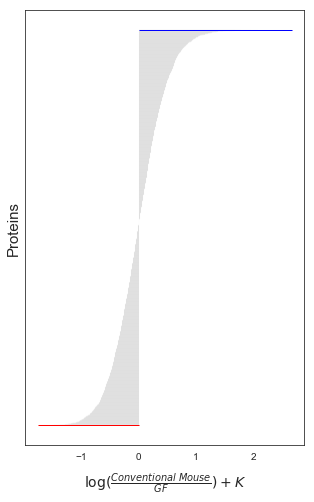

In [52]:
coefs = rank_annot['status[T.SPF]'].sort_values()
x = np.arange(coefs.shape[0])

fig = plt.figure(figsize=(5, 8))

plt.barh(x, coefs, 1, label='', alpha=0.2, edgecolor='#D0D0D0', lw=0.1, color='#D0D0D0') #gray
plt.ylabel('Proteins', size=15)
plt.yticks([])
plt.xlabel(r'$\log (\frac{Conventional\; Mouse}{GF}) + K$', fontsize=14, labelpad=10, rotation=0)

plt.barh(4458, 2.6676834934210385, lw=1, edgecolor='blue', color='blue')
plt.barh(0, -1.7588500864053156, lw=1, edgecolor='red', color='red')

#plt.savefig('Figure_X.svg')

### Protein Abundances

In [47]:
proteins = proteins.T
proteins['sum'] = proteins.sum(axis=1)

In [48]:
metadata = pd.merge(metadata, proteins, left_index=True, right_index=True)

In [49]:
metadata.sort_values('status', inplace=True)

Text(0, 0.5, 'Igkv5-39')

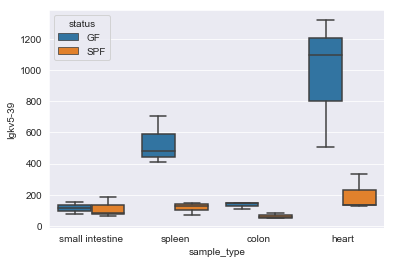

In [66]:
sns.boxplot(x='sample_type', y= 'A0A075B5M7', hue='status', data=metadata)
plt.ylabel('Igkv5-39')

Text(0, 0.5, 'Nnt')

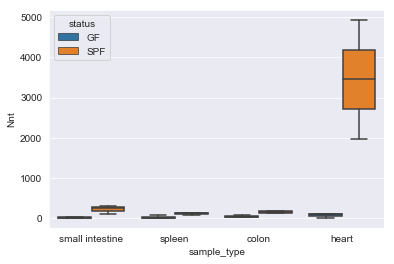

In [65]:
sns.boxplot(x='sample_type', y= 'Q61941', hue='status', data=metadata)
plt.ylabel('Nnt')

In [61]:
#Getting the logratio of Nnt over total proteins per sample

metadata['log10_Nnt'] = np.log10(metadata['Q61941']/metadata['sum'])

In [62]:
#Getting the logratio of Igkv5-39 over total proteins per sample

metadata['log10_Igkv539'] = np.log10(metadata['A0A075B5M7']/metadata['sum'])

In [63]:
sns.set_style('darkgrid')

In [64]:
cols = ['maroon', 'grey']

In [67]:
metadata = metadata.replace(to_replace='SPF', value='Conventional')

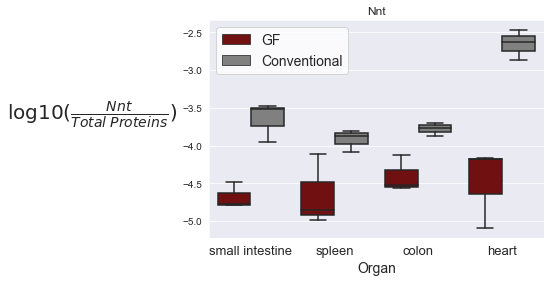

In [68]:
sns.boxplot(x='sample_type', y= 'log10_Nnt', hue='status', palette=cols, data=metadata)
plt.title('Nnt')

plt.ylabel(r'$\log10 (\frac{Nnt}{Total \; Proteins})$', fontsize=20, labelpad=90, rotation=0)
plt.xticks(size=13)
plt.xlabel('Organ', size=14)
plt.yticks(size=10)

plt.legend(fontsize=14, facecolor='white')

#plt.savefig('Nnt10.svg')

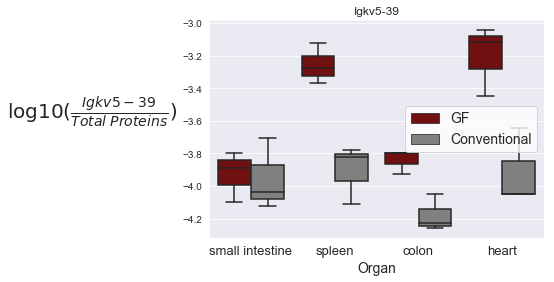

In [69]:
sns.boxplot(x='sample_type', y= 'log10_Igkv539', hue='status', palette=cols, data=metadata)
plt.title('Igkv5-39')

plt.ylabel(r'$\log10 (\frac{Igkv5-39}{Total \; Proteins})$', fontsize=20, labelpad=90, rotation=0)
plt.xticks(size=13)
plt.xlabel('Organ', size=14)
plt.yticks(size=10)

plt.legend(fontsize=14, facecolor='white')
#plt.savefig('Igkv539_10.svg')